# Business Understanding

In [37]:
#import the libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
import plotly.express as px

In [38]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv')

In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [43]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
#there's' only 1 house that has 33 bedrooms so we'll take a look at that specific row
df.loc[df['bedrooms'] > 12]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [44]:
#since the above bedrooms entry with 33 bedrooms with 1.75 seems incorrect, we are going to update it to no of bedrooms = 3
df.loc[df['bedrooms'] > 12, 'bedrooms'] = 3

In [45]:
#Dropping the columns that will not be useful.
df.drop(columns=['id'], inplace=True)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [46]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data cleaning: Model 2

Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [47]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. 
The maximum house price is listed as 7,700,000 and the minimum price is 78,000.

In [48]:
#Look at the view column:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [49]:
#We will check the view column to see how many null values it holds:
df['view'].isna().sum()

63

In [50]:
#fill the null values with None:
df['view'] = df['view'].fillna('NONE')
df['view'].isna().sum()

0

 Since view is a categorical data we are going to convert it into numerical data:

In [51]:
# we are going to map our caterogical values to numerical values:
view_numerical = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_numerical, inplace=True)


In [52]:
# let's look at where the houses with most excellent views are:
fig_view = px.scatter_mapbox(df[df['view']== 5],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=7)
#plt.title('View')
fig_view.update_layout(mapbox_style='open-street-map')

plt.savefig('View.pdf')

fig_view.show()

<Figure size 432x288 with 0 Axes>

Checking for grade: This is also a categorical data we are going to replace it with numerical values.

In [53]:
#checking for the values in grade columns:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [54]:
#mapping these to numerical values:
grade_numerical = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13 }
df['grade'].replace(grade_numerical,inplace = True)

In [55]:
# We are goiing to check for condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [56]:
#mapping the categorical values to numerical valeus:
condition_numerical = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}
df['condition'].replace(condition_numerical,inplace = True)

In [57]:
#Lets have a look at the waterfront column:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [58]:
df['waterfront'].isna().sum()

2376

In [59]:
#let's fill the waterfront missing values:
df['waterfront'] = df['waterfront'].fillna('NONE')
df['waterfront'].isna().sum()

0

In [60]:
#We will map the values of NO,Yes to numerical values:
waterfront_numerical = {'NONE': 0,
                        'YES': 1,
                         'NO':2,
                        }
df['waterfront'].replace(waterfront_numerical,inplace = True)

In [61]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,1,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2,1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,2,1,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,2,1,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,2,1,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [62]:
loc_df = df[['lat', 'long', 'price']]

In [63]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1.773209,1.233181,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.628813,0.764673,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,2.000000,1.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,2.000000,1.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2.000000,1.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,2.000000,5.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


we want to see where the houses with mean prices lie:
Mean of house prices is around 540,000.

In [64]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 600000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
plt.savefig('Mean_house_locations.pdf')
fig.show()

<Figure size 432x288 with 0 Axes>

The above figure shows the areas that contain house's with mean prices of around 540,000 which seems to be mostly conecntrated around Redmond,Sammamish,Issaquah.

We will take a look at the scatter plots of each variable compared to price to see if there are any linear trends.
We look at continuous and categorical variables separately.

IndexError: list index out of range

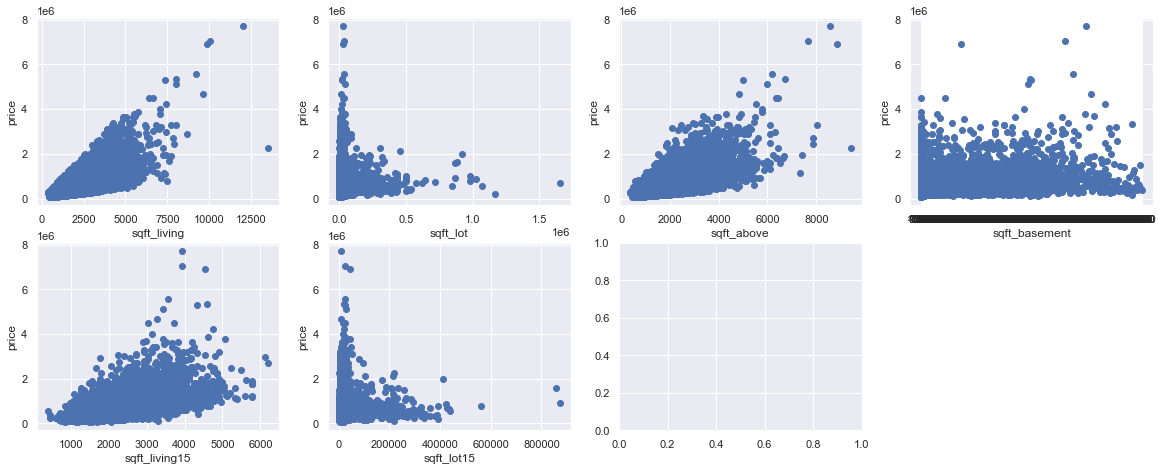

In [65]:
#Let's look at continous variables first:
cont_columns = [ 'sqft_living', 'sqft_lot',
               'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
plt.figure(figsize=(20,20))
for i in range(0, 10):
    plt.subplot(5, 4, i+1)
    if i > 8:
        break
    plt.scatter(df[cont_columns[i]], df['price'])
    plt.xlabel(cont_columns[i])
    plt.ylabel('price')
plt.savefig('Continous_variables_linearTrends.pdf')    
plt.tight_layout()

Looking at the scatter plots we can observe that sqft_living has a positive correlation with Price(given few outliers). As thes size of house increases it tends to cost more.
Lot sizes seem to be negatively correlated with housing prices.
Suprisingly, sqft_basement do not seem to have a strong correlation with price.
Sqft_above has a high positive coorelation with price indicating that people prefer houses with more living space than basement.

In [ ]:
#Lets have a look at catergorical data columns:
categorical_columns =  [ 'bedrooms', 'bathrooms',
               'floors', 'waterfront','view', 'grade','condition']
plt.figure(figsize=(20,20))
for i in range(0, 10):
    plt.subplot(5, 4, i+1)
    if i > 8:
        break
    plt.scatter(df[categorical_columns[i]], df['price'])
    plt.xlabel(categorical_columns[i])
    plt.ylabel('price')
plt.savefig('Categorical_variables_linearTrends.pdf')    
plt.tight_layout()

This categorical scatter plot shows us the positive coorelation between Bathrooms and grade. 
The number of bedrooms is linear up to 6 bedrooms. 
Also, Condition of a house is linear till 3 and then it starts to decrease.
The linearity for the number of bathrooms becomes less consistent for houses with more than 5 bathrooms.

In [ ]:
df.head()

Now, that our dataframe is ready we are going to start building our model:

Model Building

Before running a regression model with this data, we need to select which variables we believe will be the best predictors. We can eliminate variables by looking at collinearity between variables and choosing to drop one of those variables. We will choose to use a Pearson's correlation coefficient of 0.7 as the initial cutoff value.

In [ ]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df.corr().abs(), annot = True)
plt.savefig("Intial_Heatmap")

Analysis of Heatmap:


Model Building:

In [ ]:
X = df.drop('price', axis=1)
y= df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

In [ ]:
base_train_mean = y_train.mean()
base_train_mean

In [ ]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [ ]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

In [ ]:
# make a dataframe for our training data
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

In [ ]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_new =df_train.drop(['date', 'sqft_living','lat' ,'long'],axis=1)

In [ ]:
df_new.corr()['price'].sort_values(ascending=False)

Grade of the house has the highest correlation with price.Waterfront and zipcode seems to have a negative coorelation.